In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [14]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Flatten
from keras.utils import np_utils

#Camadas de convolução e MaxPooling 2D porque imagens são objetos 2D (ou seja, imagens)
from keras.layers import Conv2D, MaxPooling2D

- Mnist do keras já possui a divisão entre treino e teste

In [72]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

- Dimensões

In [73]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


- Para visualizar qualquer imagem 

In [74]:
X_train[0].shape

(28, 28)

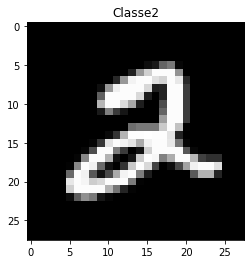

In [75]:
i = 5
plt.title('Classe' + str(y_train[5]))
plt.imshow(X_train[5], cmap = 'gray')

## Transformação para tensores

In [76]:
def array2tensor(array, channels):
    tensor = array.reshape(array.shape[0], 
                           array.shape[1],
                           array.shape[2],
                           channels)
    return tensor

In [77]:
#Como a imagem veio com apenas um canal, só passo trabalhar com 1 mesmo 
X_train = array2tensor(X_train, channels = 1)
X_test = array2tensor(X_test, channels = 1)


- Visualizar imagem

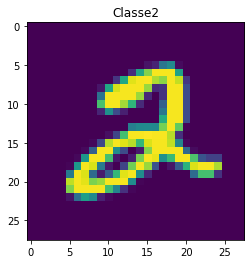

In [85]:
i = 5
plt.title('Classe' + str(y_train[i]))
plt.imshow(X_train[i,:,:,0])

- O objeto é do tipo uint8, um tipo de variável unsigned integer de 8 bits, ou seja. 
- Esta variável é sempre não negativa, representa por, por exemplo, 11111111, o qual seria o número 255

- Na notação abaixo, '0b' significa que esta é uma notação de número binário e não o número 1111111
- '0x' significa hexadecimal 
- o '0' stands for Octal, afinal, esta representação está sendo realizada em 8 bits 

In [86]:
bin(255)

'0b11111111'

In [87]:
print(type(X_train[0,0,0,0]))

<class 'numpy.float32'>


- Para realizar as operações matemáticas na rede neural, utilizaremos o formato de float a qual permitirá a realização da normalização

In [88]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Modificação da escala de valores
- Transformação da escala porque os números estão entre 0 e 255, o que resultaria em um tempo muito maior de treinamento da rede. 
- 255 é o valor máximo observado em cada vetor. Este valor obviamente está atrelado à escala de cores RGB

In [89]:
X_train_s = X_train/255
X_test_s = X_test/255

In [90]:
X_train_s.shape

(60000, 28, 28, 1)

### One Hot Encode (Dummy data) para codificação da saíde, porque há 10 saídas possíveis

In [91]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)